# Project Scope

A United Kingdom (UK) based online retail shop wants to maximize sales hence decides to study the behavior of its customers and segment them appropriately to enhance target marketing.

We endeavour to find the various customer segments using the online retail store's transaction data. This is a trans-national dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011.


# Data Exploration and Preprocessing 

In [1]:
# Importing standard libraries and packages

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
#Reading the file and storing as a dataframe

df= pd.read_csv('C:\\Users\\kojoa\\Desktop\\Blossom Academy\\Customer Segmentation project\\data.csv', parse_dates=["InvoiceDate"], encoding="latin1")

In [3]:
#Viewing the header of the dataframe

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Viewing the size of the dataframe

df.shape

(541909, 8)

In [5]:
#Summary statistics of the data

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
#Information on the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#Checking for duplicates

df.duplicated().sum()

5268

In [8]:
#Removing duplicates

df.drop_duplicates(inplace= True)

In [9]:
#New dataframe size

df.shape

(536641, 8)

In [10]:
#Number of times different countries appeared/ number of different orders from countries

df['Country'].value_counts()

United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

<AxesSubplot:>

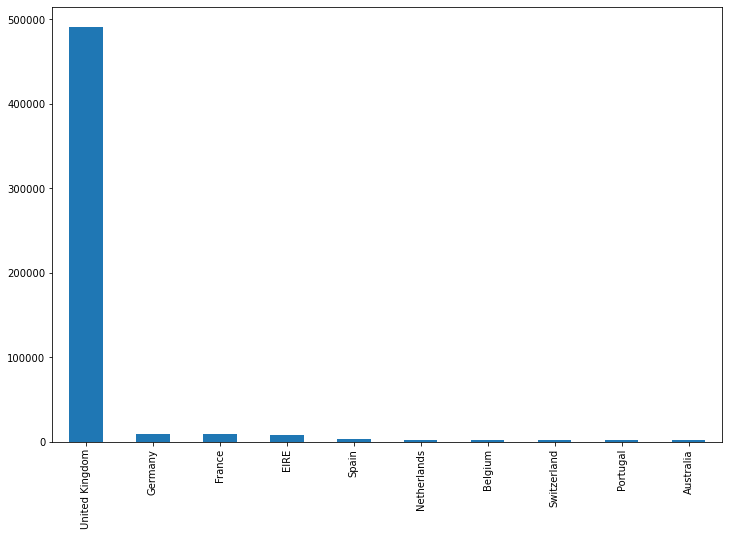

In [11]:
#Count of Top 10 countries with the most orders

df['Country'].value_counts().head(10).plot.bar(figsize=(12,8))

<AxesSubplot:>

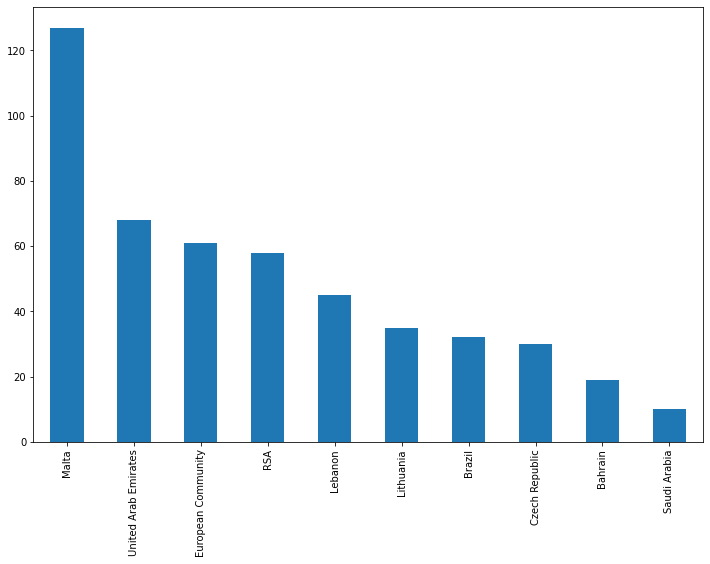

In [12]:
#Count of Top 10 countries with the least orders

df['Country'].value_counts().tail(10).plot.bar(figsize=(12,8))

In [13]:
#Checking the total number of products, transactions and customers

pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,4070,25900,4372


There are 4372 unique customer records in the dataset.<br>
There are 4070 unique product records in the dataset.<br>
There were 25900 unique transactions. 

## Data Cleaning

In [14]:
#Looking for missing entries

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

Entries with no customer ID cannot be segmented.<br>
All items with empty descriptions also have no customer IDs.

In [15]:
#Removing missing values

df.dropna(inplace= True)

In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df.shape

(401604, 8)

In [18]:
# Identifying cancelled orders

invoices = df['InvoiceNo']
x = invoices.str.contains('C', regex=True)
x.fillna(0, inplace=True)

#Create a new column called Order_Cancelled

df['Order_Cancelled'] = x

In [19]:
df['Order_Cancelled'].value_counts()

False    392732
True       8872
Name: Order_Cancelled, dtype: int64

8872 orders were cancelled.

In [20]:
#Checking for customers with negative quantity orders

df.loc[df['Quantity']< 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_Cancelled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,True


8872 orders had negative quantity orders.<br>
It is fair to assume that the orders with negative quantities were all cancelled.

In [21]:
#Removing cancelled orders

df = df.loc[df['Order_Cancelled'] == False,:]
df.reset_index(drop=True,inplace=True)

In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
392727,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False
392728,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False
392729,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False
392730,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False


It was noticed in the exploratory data analysis phase that majority of the transactions belonged to UK, so it alone will be considered for maximum impact.

In [23]:
# Filter UK only data

df_uk = df[df.Country == 'United Kingdom']
df_uk.shape
df_uk.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [24]:
#Checking the total number of products, transactions and customers after data preprocessing

pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3665,18536,4339


There are now 4339 unique customer records in the dataset.<br>
There are now 3665 unique product records in the dataset.<br>
There are now 18536 unique transactions. 

## Working with UK data only since majority of orders are from that country

In [25]:
#Data to create cohorts

cohort_data = df_uk[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country']]

In [26]:
# Variable to calculate date ranges

all_dates = (pd.to_datetime(cohort_data['InvoiceDate'].apply(lambda x:x.date())))

In [27]:
# Check range of dates

(all_dates.max() - all_dates.min())

Timedelta('373 days 00:00:00')

Dataset covers orders over a 373 day period.

In [28]:
# Start and end dates:

print('Start date: {}'.format(all_dates.min()))
print('End date: {}'.format(all_dates.max()))

Start date: 2010-12-01 00:00:00
End date: 2011-12-09 00:00:00


In [29]:
cohort_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



# Recency, Frequency and Monetary Value Segmentation (RFM)

Recency measures how recent was each customer's last purchase was.<br>
Frequency measures how many purchases the customer has done in the last 13 months<br>
MonetaryValue measures how much has the customer spent in the last 13 months.<br>
Time given period is specific for this case study. Can be chosen arbitrarily.


In [30]:
# Create a new column 'TotalSum' to help determine MonetaryValue

cohort_data['TotalSum'] = cohort_data['Quantity']*cohort_data['UnitPrice']
cohort_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [31]:
# Find the max date and take data till a year behind the max date

from dateutil.relativedelta import relativedelta
start_date = all_dates.max()-relativedelta(months=12,days=-1)
print('Start date: {}'.format(start_date))
print('End date: {}'.format(all_dates.max()))

Start date: 2010-12-10 00:00:00
End date: 2011-12-09 00:00:00


In [32]:
# Preprocessing date to cover a full year

data_rfm = cohort_data[cohort_data['InvoiceDate'] >= pd.to_datetime(start_date)]
data_rfm.reset_index(drop=True,inplace=True)
data_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,538172,21562,HAWAIIAN GRASS SKIRT,12,2010-12-10 09:33:00,1.25,15805.0,United Kingdom,15.0
1,538172,79321,CHILLI LIGHTS,8,2010-12-10 09:33:00,4.95,15805.0,United Kingdom,39.6
2,538172,22041,"RECORD FRAME 7"" SINGLE SIZE",12,2010-12-10 09:33:00,2.55,15805.0,United Kingdom,30.6
3,538172,84558A,3D DOG PICTURE PLAYING CARDS,12,2010-12-10 09:33:00,2.95,15805.0,United Kingdom,35.4
4,538172,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2010-12-10 09:33:00,0.55,15805.0,United Kingdom,13.2


In [33]:
# Create snapshot date

snapshot_date = max(data_rfm.InvoiceDate) + dt.timedelta(days=1)
print('Snapshot date: {}'.format(snapshot_date.date()))


Snapshot date: 2011-12-10


Create a hypothetical snapshot date that will be used as a starting point to calculate metrics as 
if we're doing the analysis on the most recent data.

In [34]:
# Aggregate data on a customer level
# Create customer behaviour metrics: Recency, Frequency and Monetary Value

data = data_rfm.groupby(['CustomerID'],as_index=False).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,\
                                                            'InvoiceNo': 'count',\
                                                            'TotalSum': 'sum'}).rename(columns = {'InvoiceDate': 'Recency',\
                                                                                                  'InvoiceNo': 'Frequency',\
                                                                                                  'TotalSum': 'MonetaryValue'})

# Check the first rows
data.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12747.0,2,96,3837.45
2,12748.0,1,4055,31081.74
3,12749.0,4,199,4090.88
4,12820.0,3,59,942.34


The result is a table which has a row for each customer with their recency, frequency and monetary value as of today, as if we were running the analysis the day after this data was pulled from the retailer's website which would be the case in the real world.

## Recency, Frequency and Monetary Quartiles

In [35]:
# Create percentile values on the RFM metrics.
# Calculate percentiles and assign labels

# Frequency and monetaryvalue labels
r_labels = range(4, 0, -1)
f_labels = range(1,5)
m_labels = range(1,5)

# Recency, Frequency and monetaryvalue percentiles
r_quartiles = pd.qcut(data['Recency'], 4, labels = r_labels)
f_quartiles = pd.qcut(data['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(data['MonetaryValue'], 4, labels = m_labels)

# Assigning labels
data = data.assign(R = r_quartiles.values)
data = data.assign(F = f_quartiles.values)
data = data.assign(M = m_quartiles.values)
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,12346.0,326,1,77183.60,1,1,4
1,12747.0,2,96,3837.45,4,3,4
2,12748.0,1,4055,31081.74,4,4,4
3,12749.0,4,199,4090.88,4,4,4
4,12820.0,3,59,942.34,4,3,3


In [65]:
# Concatenate RFM quartile values to RFM_Segment

def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

data['RFM_Segment'] = data.apply(join_rfm, axis=1)
data['RFM_Score'] = data[['R','F','M']].sum(axis=1)
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,12346.0,326,1,77183.60,1,1,4,114,6,Middle
1,12747.0,2,96,3837.45,4,3,4,434,11,Top
2,12748.0,1,4055,31081.74,4,4,4,444,12,Top
3,12749.0,4,199,4090.88,4,4,4,444,12,Top
4,12820.0,3,59,942.34,4,3,3,433,10,Top


In [37]:
# Clusters based on RFM Score

data.groupby('RFM_Score').agg({'Recency': 'mean',
                                   'Frequency': 'mean',
                                   'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           242.6       7.9         149.8   324
4           171.0      13.7         224.3   353
5           147.6      20.0         351.1   456
6            87.4      27.0         807.3   432
7            80.8      38.9         717.1   399
8            56.3      52.0         930.3   397
9            43.8      73.5        1757.9   373
10           32.0     110.4        1869.3   389
11           20.6     183.7        3405.9   334
12            6.9     351.9        8027.9   398

## RFM Segments

In [38]:
# Grouping into named segments 

def create_segment(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Middle'
    else:
        return 'Low'
    
data['General_Segment'] = data.apply(create_segment, axis=1)
data.groupby('General_Segment').agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               205.3      10.9         188.7   677
Middle             94.8      33.8         691.4  1684
Top                25.7     181.9        3825.7  1494

We have grouped customers based on their RFM scores into smaller number of segments. Within the General Segment we have 3 groups: Top, Middle and Low. The top customers have a low recency count, with high frequency and monetary value results.

# Customer Segmentation with K-Means

### Key steps of the segmentation project
1. Pre-process the data <br>
2. Run k-means clustering<br>
3. Explore the data and choose the best number of clusters<br>
4. Analyze and visualize average RFM values on each cluster

## 1. Data Preprocessing for Clustering

C:\Users\kojoa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kojoa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kojoa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

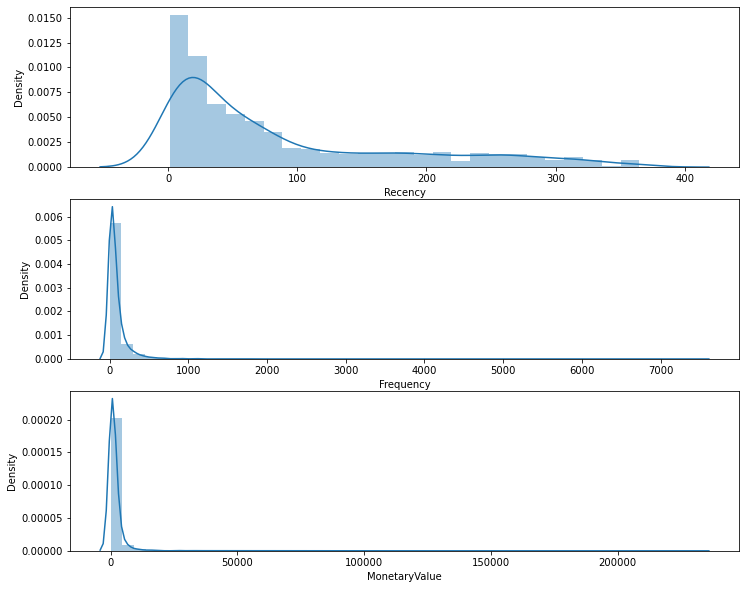

In [39]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.

plt.figure(figsize=(12,10))

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(data['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(data['Frequency'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(data['MonetaryValue'])

In [40]:
# Checking for constant mean and variance

data[['Recency','Frequency','MonetaryValue']].describe()

,Recency,Frequency,MonetaryValue
count,3855.000000,3855.000000,3855.000000
mean,87.428016,87.205966,1817.792603
std,93.428162,209.411865,7190.041841
min,1.000000,1.000000,0.000000
25%,17.000000,16.000000,291.680000
50%,50.000000,40.000000,638.060000
75%,134.000000,96.000000,1545.515000
max,365.000000,7491.000000,231822.690000


Removing the customer with 0 MonetaryValue from the data

In [41]:
data[data['MonetaryValue'] == 0]

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
310,13256.0,14,1,0.0,4,1,1,4.01.01.0,6,Middle


In [42]:
data = data[data['MonetaryValue'] > 0]
data.reset_index(drop=True,inplace=True)

## Data transformation to manage skewness:- Log Transformation

In [43]:
raw_data = data[['Recency','Frequency','MonetaryValue']]

In [44]:
# Unskew the data
data_log = np.log(raw_data)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(data_log)

# Scale and center the data
data_normalized = scaler.transform(data_log)

# Create a pandas DataFrame
data_norm = pd.DataFrame(data=data_log, index=raw_data.index, columns=raw_data.columns)

Centering the data is done to make mean values be the same.<br>
Scaling makes the deviation or variance values match. <br>
These are necssary because log transformations work to unskew data when these conditions are met.<br>

In [45]:
# Viewing normalised data

data_norm.head()

,Recency,Frequency,MonetaryValue
0,5.786897,0.000000,11.253942
1,0.693147,4.564348,8.252563
2,0.000000,8.307706,10.344376
3,1.386294,5.293305,8.316515
4,1.098612,4.077537,6.848366


C:\Users\kojoa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kojoa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kojoa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

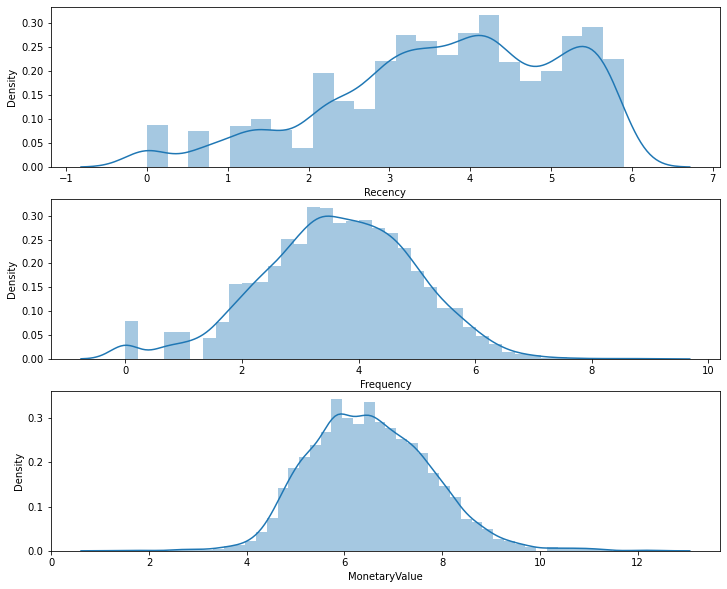

In [46]:
#Checking for skewness in the data now

plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_norm['MonetaryValue'])

# Show the plot
plt.show()

As we can see from the above plots, skewness has been removed from the data.

## 2. Customer Segmentation with K-Means

In [47]:
sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_norm)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

## 3. Visualisation method to determine number of clusters

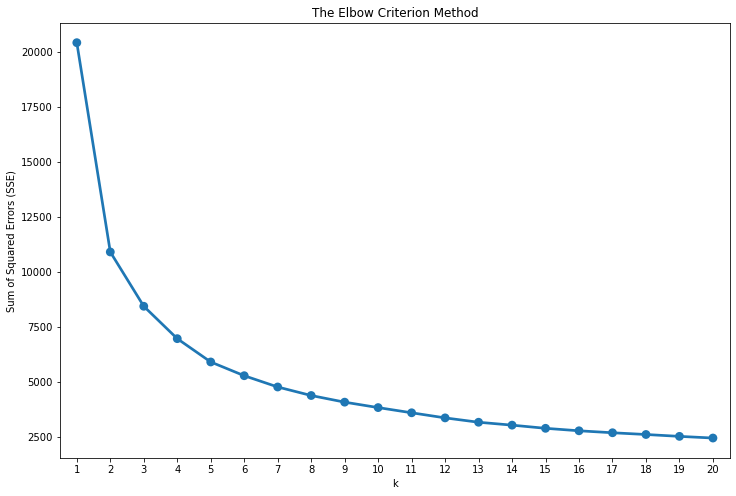

In [48]:
#Plot Elbow criterion or Inertia graph

plt.figure(figsize=(12,8))

plt.title('The Elbow Criterion Method')
plt.xlabel('k'); 
plt.ylabel('Sum of Squared Errors (SSE)')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

From the above plot, we can see that the optimal number of clusters are 3 and 4.<br>
Therefore, we will build segmentation based on 3 and 4 clusters, and compare the outputs.<br>

Let us take k = 3 first.

In [49]:
kmeans = KMeans(n_clusters=3, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(data_norm)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_

In [50]:
# Create a cluster label column in the original DataFrame
data_norm_k3 = data_norm.assign(Cluster = cluster_labels)
data_k3 = raw_data.assign(Cluster = cluster_labels)

# Calculate average RFM values and size for each cluster
summary_k3 = data_k3.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'MonetaryValue': ['mean', 'count'],}).round(0)

summary_k3

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          66.0      67.0        1185.0  1637
1         162.0      15.0         285.0  1360
2          10.0     240.0        5461.0   857

A table showing how the segments differ from each other based on their RFM values.

Let us now take k = 4.

In [51]:
kmeans = KMeans(n_clusters=4, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(data_norm)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_

In [52]:
# Create a cluster label column in the original DataFrame
data_norm_k4 = data_norm.assign(Cluster = cluster_labels)
data_k4 = raw_data.assign(Cluster = cluster_labels)

# Calculate average RFM values and size for each cluster
summary_k4 = data_k4.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'MonetaryValue': ['mean', 'count'],}).round(0)

summary_k4

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          21.0      35.0         526.0   771
1         178.0      15.0         293.0  1216
2          10.0     269.0        6197.0   721
3          85.0      85.0        1551.0  1146

A table showing how the segments differ from each other based on their RFM values.

# Profiling and interpreting segments

Let us view the results side by side.

In [53]:
display(summary_k3)
display(summary_k4)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          66.0      67.0        1185.0  1637
1         162.0      15.0         285.0  1360
2          10.0     240.0        5461.0   857

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          21.0      35.0         526.0   771
1         178.0      15.0         293.0  1216
2          10.0     269.0        6197.0   721
3          85.0      85.0        1551.0  1146

We can also build snakeplots to understand and compare the segments. Let us build a snakeplot for our data with 4 clusters below.<br>

Before building snakeplots, let us assign back customerID values to the row indices.<br>
### Grouping with 4 clusters shows a more uniform distribution of RFM values. We are able to see that more people spend at average rates. It thus gives us more insight into customer spendings. <br>k= 4 is the preferred choice.


In [54]:
data_norm_k4.index = data['CustomerID'].astype(int)

In [55]:
data_norm_k4.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,5.786897,0.000000,11.253942,3
12747,0.693147,4.564348,8.252563,2
12748,0.000000,8.307706,10.344376,2
12749,1.386294,5.293305,8.316515,2
12820,1.098612,4.077537,6.848366,2


## 4. Snakeplot to analyze RFM values on clusters

In [56]:
# Melt the data into along format so RFM values and metric names are stored in 1 column each
# Also normalise data so they are comparable

data_melt = pd.melt(data_norm_k4.reset_index(),
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                    var_name='Attribute',
                    value_name='Value')

<AxesSubplot:title={'center':'Snake Plot of Standardized Variables'}, xlabel='Attribute', ylabel='Value'>

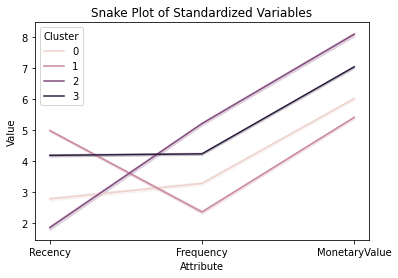

In [57]:
plt.title('Snake Plot of Standardized Variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=data_melt)

Segments can now be easily compared and analysed.

## We can also use the following method to understand the relative importance of segments in the data. To do this, we will complete the following steps:<br>

1. Calculate average values of each cluster<br>
2. Calculate average values of population<br>
3. Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average)<br>

Assigning CustomerID index to data_k4 dataframe:

In [58]:
data_k4.index = data['CustomerID'].astype(int)
data_k4.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,326,1,77183.60,3
12747,2,96,3837.45,2
12748,1,4055,31081.74,2
12749,4,199,4090.88,2
12820,3,59,942.34,2


In [59]:
# Assigning CustomerID index to raw_data dataframe:

raw_data.index = data['CustomerID'].astype(int)
raw_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,1,77183.60
12747,2,96,3837.45
12748,1,4055,31081.74
12749,4,199,4090.88
12820,3,59,942.34


In [60]:
#Calculate average values of each cluster and population

cluster_avg = data_k4.groupby(['Cluster']).mean()
population_avg = raw_data.head().mean()

In [61]:
# View cluster average values

cluster_avg

,Recency,Frequency,MonetaryValue
Cluster,,,
0,21.356680,34.557717,525.642127
1,178.092928,14.846217,293.134425
2,9.758669,268.549237,6196.815354
3,84.605585,85.390052,1551.452943


In [62]:
# View population average values

population_avg

Recency             67.200
Frequency          882.000
MonetaryValue    23427.202
dtype: float64

In [63]:
# Calculating relative importance of RFM values in each cluster

relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.68,-0.96,-0.98
1,1.65,-0.98,-0.99
2,-0.85,-0.70,-0.74
3,0.26,-0.90,-0.93


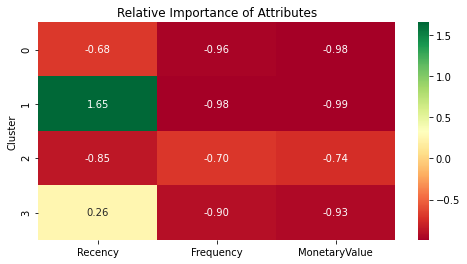

In [64]:
# Plot heatmap

plt.figure(figsize=(8, 4))
plt.title('Relative Importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In general, our segments should differ from the overall population, and have distinctive properties of their own. The result is a relative importance score for each RFM value of the segments. The further that ratio is from zero, the more important that attribute is for defining a specific cluster compared to the population average. 